0.12128573269320561


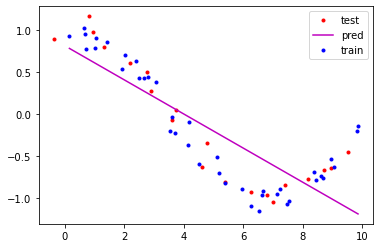

[-0.20326067  0.81331662]


In [1]:
'''
Illustrates a simple regression task on 
simulated data. 

Trying to find polynomial approximations 
to a sinusoid

It gives an idea how 
non linear regression works

/home/splab-ece/deepl/nonlinear.ipynb

'''

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


def SimulData():
        # Simulate some data for training 
        x_train = np.arange(0,10, 0.25 )
        x_train = x_train + 1.0/3.0 * np.random.randn(x_train.size);
        y_train  = np.cos( x_train  * np.pi /7) +  0.1 * np.random.randn(x_train.size);

        x_test = np.arange(0,10, 0.5 )
        x_test = x_test + 1.0/3.0 * np.random.randn(x_test.size);
        y_test  = np.cos( x_test  * np.pi /7)+  0.1 * np.random.randn(x_test.size)

        return (x_train,y_train) , (x_test, y_test)

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = SimulData();
xs = np.arange( np.min(x_train), np.max(x_train),0.01 )

#print(x_train.shape)
#print(x_test.shape)
#    Line Model 
x_t1 = np.vstack((x_train,np.ones(x_train.shape))).T;
y_t1 = np.zeros((x_train.shape[0],1))
y_t1 = y_train

a = np.dot(np.linalg.inv( np.dot(x_t1.T, x_t1) ), np.dot(x_t1.T,y_t1))
ys = xs * a[0] + a[1]; 
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,ys,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

#Evaluate the Test Error (Mean Square ERROR - MSE)
x_t1_test = np.vstack((x_test, np.ones(x_test.shape))).T
predicted_values = np.dot(x_t1_test,a)
MSE1 = (np.square(predicted_values - y_test)).mean()
print(MSE1)
MSE =[]
MSE.append(MSE1)
m =[]
m.append(1)
plt.legend()
plt.show()
print(a)


# TRY TO FIT HIGHER ORDER MODELS 
# y = a0 + a1 x + a2 x^2  + ... + am x^m
#  FOR MODEL ORDER m = 1,2,3,4,5


# Plot the Test MSE vs model order 

(40, 3)


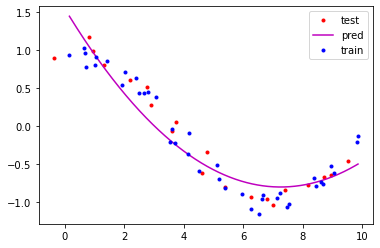

[ 0.04443948 -0.64520884  1.53544208]
0.07142330501265184


In [2]:
#m = 2 Model
#y = a0 + a1 x + a2 x^2 
 
x_t1 = np.vstack((x_train**2,x_train,np.ones(x_train.shape))).T;
y_t1 = y_train
#print((x_train**2).shape)
a = np.dot(np.linalg.inv( np.dot(x_t1.T, x_t1) ), np.dot(x_t1.T,y_t1))
ys = (xs**2) * a[0] + xs*a[1] + a[2]; 
print(x_t1.shape) 
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,ys,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');
plt.legend()
plt.show()
print(a)

#Evaluate the Test Error (Mean Square ERROR - MSE)
x_t1_test = np.vstack((x_test**2,x_test, np.ones(x_test.shape))).T
predicted_values = np.dot(x_t1_test,a)
MSE2 = (np.square(predicted_values - y_test)).mean()
print(MSE2)
MSE.append(MSE2)
m.append(2)

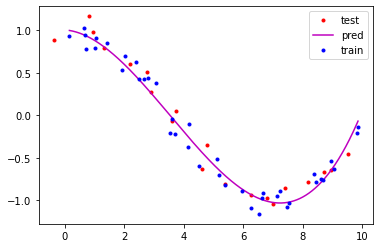

[ 0.01024866 -0.10959882 -0.02521265  1.00581145]
0.014200682854778404


In [3]:
#m = 3 Model
#y = a0 + a1 x + a2 x^2 + a3 x^3
 
x_t1 = np.vstack((x_train**3,x_train**2,x_train,np.ones(x_train.shape))).T;
y_t1 = np.zeros((x_train.shape[0],1))
y_t1 = y_train

a = np.dot(np.linalg.inv( np.dot(x_t1.T, x_t1) ), np.dot(x_t1.T,y_t1))
ys = (xs**3) * a[0] + (xs**2) * a[1] + xs*a[2] + a[3]; 
#print(x_t1.shape) 
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,ys,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');
plt.legend()
plt.show()
print(a)
#Evaluate the Test Error (Mean Square ERROR - MSE)
x_t1_test = np.vstack((x_test**3, x_test**2,x_test, np.ones(x_test.shape))).T
predicted_values = np.dot(x_t1_test,a)
MSE3 = (np.square(predicted_values - y_test)).mean()
print(MSE3)
MSE.append(MSE3)
m.append(3)

(40, 5)


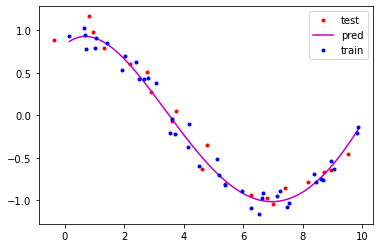

[-0.00108942  0.03233006 -0.25389792  0.30288669  0.83090879]
0.013389524855723608


In [4]:
#m = 4 Model
#y = a0 + a1 x + a2 x^2 + a3 x^3 + a4 x^4
 
x_t1 = np.vstack((x_train**4, x_train**3,x_train**2,x_train,np.ones(x_train.shape))).T;
y_t1 = y_train

a = np.dot(np.linalg.inv( np.dot(x_t1.T, x_t1) ), np.dot(x_t1.T,y_t1))
ys = (xs**4) * a[0] + (xs**3) * a[1] + (xs**2) * a[2] + xs*a[3] + a[4]; 
print(x_t1.shape) 
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,ys,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');
plt.legend()
plt.show()
print(a)

#Evaluate the Test Error (Mean Square ERROR - MSE)
x_t1_test = np.vstack((x_test**4,x_test**3, x_test**2,x_test, np.ones(x_test.shape))).T
predicted_values = np.dot(x_t1_test,a)
MSE4 = (np.square(predicted_values - y_test)).mean()
print(MSE4)
MSE.append(MSE4)
m.append(4)

(40, 6)


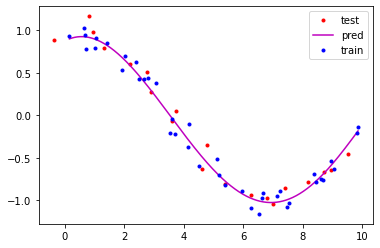

[-8.81681018e-05  1.15663470e-03  1.18691069e-02 -1.74371757e-01
  1.81982247e-01  8.77703787e-01]
0.011870574860437102


In [7]:
#m = 5 Model
#y = a0 + a1 x + a2 x^2 + a3 x^3 + a4 x^4 + a5 x^5
 
x_t1 = np.vstack((x_train**5,x_train**4, x_train**3,x_train**2,x_train,np.ones(x_train.shape))).T;
y_t1 = y_train

a = np.dot(np.linalg.inv( np.dot(x_t1.T, x_t1) ), np.dot(x_t1.T,y_t1))
ys = (xs**5) * a[0] + (xs**4) * a[1] + (xs**3) * a[2] + (xs**2) * a[3] + xs*a[4] + a[5]; 
print(x_t1.shape) 
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,ys,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');
plt.legend()
plt.show()
print(a)

#Evaluate the Test Error (Mean Square ERROR - MSE)
x_t1_test = np.vstack((x_test**5,x_test**4,x_test**3, x_test**2,x_test, np.ones(x_test.shape))).T
predicted_values = np.dot(x_t1_test,a)
MSE5 = (np.square(predicted_values - y_test)).mean()
print(MSE5)
MSE.append(MSE5)
m.append(5)

[0.12128573269320561, 0.07142330501265184, 0.014200682854778404, 0.013389524855723608, 0.011870574860437102]
[1, 2, 3, 4, 5]


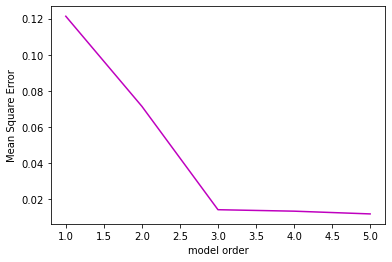

In [6]:
#Plot of MSE vs model order 
plt.plot(m,MSE,'m',label='pred')
plt.xlabel('model order')
plt.ylabel('Mean Square Error')
print(MSE)
print(m)